In [12]:
import pandas as pd
import matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

def loadNuclearData():
    # Use pandas to load the dataset
    data = pd.read_csv('nuclear_dataset.csv')   
    return data;

def summariseDataSet():
    # Load Dataset.
    dataSet = loadNuclearData()
    for column in dataSet:
        # For every column, skipping the label column 'Status'.
        if column != 'Status':
            # Summarise the feature column.
            summariseFeature(dataSet[column], column)

def summariseFeature(feature, featureName):
    mean = feature.mean()
    stdDev = feature.std()
    minVal = feature.min()
    maxVal = feature.max()
    
    print(featureName + " Statistics")
    print("-----------------------------------")
    print("Feature Length: " + str(len(feature)))
    print("Mean: " + str(mean))
    print("Standard Deviation: " + str(stdDev))
    print("Minimum: " + str(minVal))
    print("Maximum: " + str(maxVal) + "\n")
    
def plotBoxes():
    # Load Datset.
    dataSet = loadNuclearData()
    
    # Extract the data we need to use.
    statuses = dataSet['Status'].values
    vibration1Set = dataSet['Vibration_sensor_1'].values
    normalVibration1, abnormalVibration1 = extractNormalAndAbnormalValues(statuses, vibration1Set)
    
    # Construct the 2D list for plotting.
    plotData = [normalVibration1, abnormalVibration1]
    
    plt.figure()
    fig, ax = plt.subplots()
    ax.boxplot(plotData)
    plt.title("Box Plot of Normal and Abnormal Vibration Sensor 1 values")
    plt.ylabel("Vibration Sensor 1")
    plt.xlabel('Status')
    # Name the X axes ticks.
    plt.xticks([1,2], ['Normal', 'Abnormal'])
    plt.show()
    plt.close()
    
def extractNormalAndAbnormalValues(statuses, feature):
    # Initialise empty lists for normal and abnormal values.
    normalFeature = []
    abnormalFeature = []
    
    # Iterate through the rows.
    for i in range(0, len(statuses)):
        # Is the status of this row normal?
        if statuses[i] == "Normal":
            # Yes, add the feature value to the normal list.
            normalFeature.append(feature[i])
        else:
            # No, add the feature value to the abnormal list.
            abnormalFeature.append(feature[i])
    return normalFeature, abnormalFeature
    
def plotDensity():
    # Load Dataset.
    dataSet = loadNuclearData()
    
    # Extract the data we need to use.
    statuses = dataSet['Status'].values
    vibration2Set = dataSet['Vibration_sensor_2'].values
    normalVibration2, abnormalVibration2 = extractNormalAndAbnormalValues(statuses, vibration2Set)
    
    # Use pandas to plot the density plot using KDE.
    df = pd.DataFrame({
        'Normal': normalVibration2,
        'Abnormal': abnormalVibration2
    })
    ax = df.plot(kind='kde', title='Density Plot of Normal and Abnormal Vibration Sensor 1 Values')
    ax.set_xlabel('Vibration Sensor 2')

summariseDataSet()    

Power_range_sensor_1 Statistics
-----------------------------------
Feature Length: 996
Mean: 4.9995738935742935
Standard Deviation: 2.7648555187192883
Minimum: 0.0082
Maximum: 12.1298

Power_range_sensor_2 Statistics
-----------------------------------
Feature Length: 996
Mean: 6.379273152610441
Standard Deviation: 2.312568802265546
Minimum: 0.0403
Maximum: 11.9284

Power_range_sensor_3 Statistics
-----------------------------------
Feature Length: 996
Mean: 9.228112114457822
Standard Deviation: 2.5321728908943317
Minimum: 2.583966
Maximum: 15.7599

Power_range_sensor_4 Statistics
-----------------------------------
Feature Length: 996
Mean: 7.35527208634539
Standard Deviation: 4.354778181006018
Minimum: 0.0623
Maximum: 17.235858

Pressure _sensor_1 Statistics
-----------------------------------
Feature Length: 996
Mean: 14.199126817269086
Standard Deviation: 11.680045382938971
Minimum: 0.0248
Maximum: 67.9794

Pressure _sensor_2 Statistics
-----------------------------------
Feature 

<Figure size 432x288 with 0 Axes>

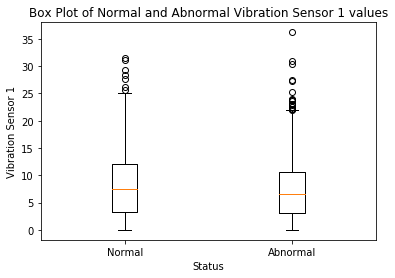

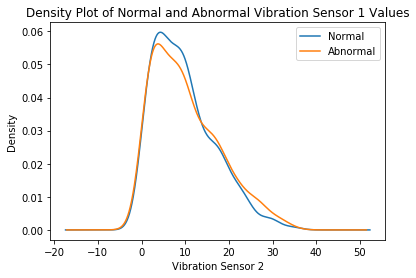

In [13]:
plotBoxes()
plotDensity()

E:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


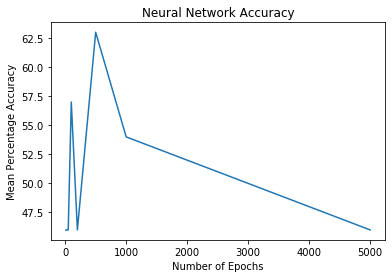

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

def loadTrainTestData():  
    dataset = loadNuclearData().values

    # Get columns 1-12 as the features.
    X = dataset[:, 1:12]

    # Get column 0 as the labels.
    Y = dataset[:, 0]
    
    # Convert labels to numeric 0 and 1.
    Y = convertLabelsToNumeric(Y)
    
    # Normalise data.
    scaler = StandardScaler()
    scaler.fit(X)

    X = scaler.transform(X)

    # Split into test and train sets.
    xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.1)
    
    return xTrain, xTest, yTrain, yTest

def convertLabelsToNumeric(labels):
    numericLabels = []
    for i in range(len(labels)):
        if labels[i] == 'Normal':
            numericLabels.append(1)
        else:
            numericLabels.append(0)
    return numericLabels

def trainNetwork(xTrain, yTrain, iterations, neuronCount):
    mlp = MLPClassifier(hidden_layer_sizes=(neuronCount,neuronCount), max_iter=iterations, activation='logistic', solver='sgd')
    mlp.fit(xTrain, yTrain)
    return mlp

def evalAccuracy(predictions, actual):
    correctNumber = 0
    for i in range(len(predictions)):
        if predictions[i] == actual[i]:
            correctNumber+=1
    accuracy = (correctNumber/len(predictions))*100
    return accuracy

def runNeuralNetwork():
    xTrain, xTest, yTrain, yTest = loadTrainTestData()
    
    accuracies = []
    iterations = [10, 50, 100, 200, 500, 1000, 5000]
    for epochs in iterations:
        # Train.
        classifier = trainNetwork(xTrain, yTrain, epochs, 500)
        # Test.
        predictions = classifier.predict(xTest)
        # Evaluate.
        accuracy = evalAccuracy(predictions, yTest)
        accuracies.append(accuracy)
    
    plt.figure()
    plt.plot(iterations, accuracies)
    plt.title('Neural Network Accuracy')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Mean Percentage Accuracy')
    plt.show()
    plt.close()

runNeuralNetwork()

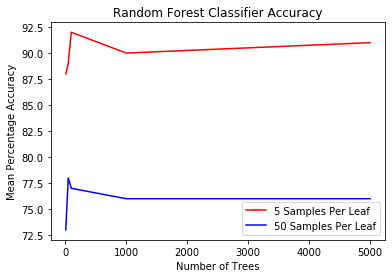

In [15]:
def trainRandomForest(xTrain, yTrain, estimators, leafSamples):
    rf = RandomForestClassifier(n_estimators=estimators, min_samples_leaf=leafSamples)
    rf.fit(xTrain, yTrain)
    return rf

def getRandomForestAccuracy(rf, xTest, yTest):
    predictions= rf.predict(xTest)
    accuracy = evalAccuracy(predictions, yTest)
    return accuracy

def runRandomForest():
    xTrain, xTest, yTrain, yTest = loadTrainTestData()
    
    leafSamples = [5, 50]
    treeNumber = [10, 50, 100, 1000, 5000]
    allAccuracies = []
    # Iterate the leaf samples.
    for leaves in leafSamples:
        accuracies = []
        # Iterate the number of trees.
        for trees in treeNumber:
            # Train.
            rf = trainRandomForest(xTrain, yTrain, trees, leaves)
            # Test and evaluate.
            accuracy = getRandomForestAccuracy(rf, xTest, yTest)
            accuracies.append(accuracy)
        allAccuracies.append(accuracies)
    plt.figure()
    plt.plot(treeNumber, allAccuracies[0], 'r-')
    plt.plot(treeNumber, allAccuracies[1], 'b-')
    plt.legend(('5 Samples Per Leaf', '50 Samples Per Leaf'))
    plt.xlabel('Number of Trees')
    plt.title('Random Forest Classifier Accuracy')
    plt.ylabel('Mean Percentage Accuracy')
    plt.show()
    plt.close()

runRandomForest()

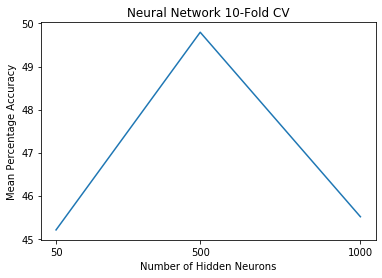

In [16]:
import math

def loadNuclearCrossValidationData():
    dataset = loadNuclearData().values
    
    # Randomly shuffle the dataset.
    np.random.shuffle(dataset)

    # Get the features (columns 1-12).
    X = dataset[:, 1:12]

    # Get the labels from the first column.
    Y = dataset[:, 0]
    
    # Convert string labels to numeric representation.
    Y = convertLabelsToNumeric(Y)
    
    # Normalise the feature values.
    scaler = StandardScaler()
    scaler.fit(X)

    X = scaler.transform(X)
    
    return X, Y
    
def splitForCrossValidation(X, Y, kFolds, foldIndex):
    totalNumberOfValues = len(Y)
    
    kSetSize = math.floor(totalNumberOfValues/kFolds)
    
    # Calculate start and end indexes.
    startPosition = kSetSize  * foldIndex
    endPosition = (startPosition+kSetSize)-1
    
    # Extract the bin for test data.
    xFold = X[startPosition:endPosition, :]
    yFold = Y[startPosition:endPosition]
    
    # Delete the extracted values to get the remaining training data.
    X = np.delete(X, np.s_[startPosition:endPosition], axis=0)
    Y = np.delete(Y, np.s_[startPosition:endPosition])
    return xFold, yFold, X, Y
    
def runNeuralNetworkCrossValidation():
    kFolds = 10
    hiddenNeurons = [50, 500, 1000]
    epochs = 200
    X, Y = loadNuclearCrossValidationData()
    
    averagedAccuracies = []
    for neuronCount in hiddenNeurons:
        accuracies = []
        for i in range(kFolds):
            # Get the current train and test sets.
            xTest, yTest, xTrain, yTrain = splitForCrossValidation(X, Y, kFolds, i)
            # Train model.
            classifier = trainNetwork(xTrain, yTrain, epochs, neuronCount)
            # Predict.
            predictions = classifier.predict(xTest)
            # Evaluate.
            accuracy = evalAccuracy(predictions, yTest)
            accuracies.append(accuracy)
        # Average the accuracies for each fold.
        averagedAccuracies.append(np.array(accuracies).mean())
    
    plt.figure()
    plt.plot(hiddenNeurons, averagedAccuracies)
    plt.title('Neural Network 10-Fold CV')
    plt.xticks(hiddenNeurons)
    plt.xlabel('Number of Hidden Neurons')
    plt.ylabel('Mean Percentage Accuracy')
    plt.show()
    plt.close()
    
runNeuralNetworkCrossValidation()

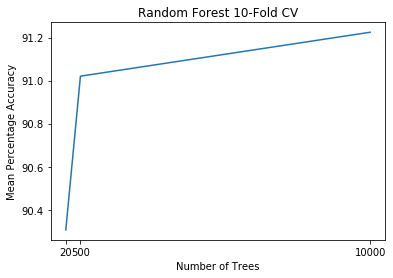

In [17]:
def runRandomForestCrossValidation():
    kFolds = 10
    numberOfTrees = [20, 500, 10000]
    samplesPerLeaf = 5
    X, Y = loadNuclearCrossValidationData()
    
    averagedAccuracies = []
    # Iterate the number of trees.
    for trees in numberOfTrees:
        accuracies = []
        # Iterate the k-folds.
        for i in range(kFolds):
            # Get the training and testing sets for this run.
            xTest, yTest, xTrain, yTrain = splitForCrossValidation(X, Y, kFolds, i)
            # Train.
            rf = trainRandomForest(xTrain, yTrain, trees, samplesPerLeaf)
            # Test and Evaluate.
            accuracy = getRandomForestAccuracy(rf, xTest, yTest)
            accuracies.append(accuracy)
        # Calculate the mean of this set of k runs.
        averagedAccuracies.append(np.array(accuracies).mean())
    
    plt.figure()
    plt.plot(numberOfTrees, averagedAccuracies)
    plt.title('Random Forest 10-Fold CV')
    plt.xlabel('Number of Trees')
    plt.xticks(numberOfTrees)
    plt.ylabel('Mean Percentage Accuracy')
    plt.show()
    plt.close()
    
runRandomForestCrossValidation()

E:\ProgramFiles\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


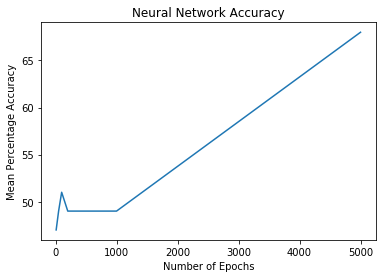

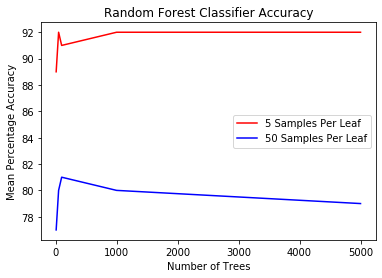

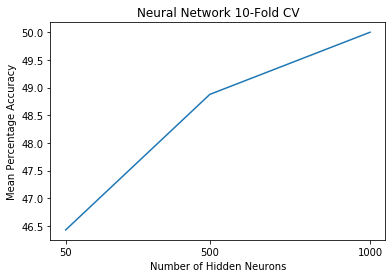

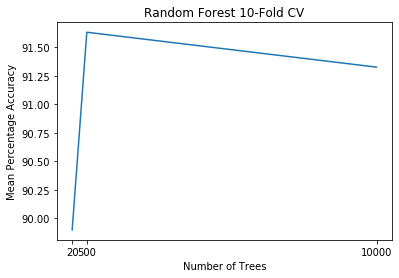

In [18]:
runNeuralNetwork()
runRandomForest()

runNeuralNetworkCrossValidation()
runRandomForestCrossValidation()